In [1]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [2]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
x_metric = "puct_c"
tags = [x_metric]
filters = {"tags": {"$in": tags}}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [3]:
# crete a dataframe from runs and summary metrics

data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

df


100%|██████████| 45/45 [00:00<00:00, 10628.06it/s]


,Self_Play/Total_Average_Reward,_wandb,Training/Learning_Rate,Self_Play/Entropies,Self_Play/Timesteps,Self_Play/Mean_Reward,Self_Play/Min_Timesteps,Self_Play/Timesteps_STD,Training/Replay_Buffer_Size,Training/Regularization_loss,...,expansion_policy,n_steps_learning,selection_policy,value_loss_weight,max_episode_length,policy_loss_weight,sample_batch_ratio,regularization_weight,tree_evaluation_policy,replay_buffer_multiplier
0,-109.608333,{'runtime': 433},0.001,"{'bins': [0.08254699523632343, 0.0828028785747...","{'values': [5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-14.125,13,1.642081,80,204.309708,...,fromprior,1,PolicyPUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
1,-144.308333,{'runtime': 469},0.001,"{'bins': [0.13088138479935496, 0.1339233228659...","{'values': [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-19.750,17,2.815772,80,201.126892,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
2,-96.300000,{'runtime': 349},0.001,"{'_type': 'histogram', 'values': [1, 1, 0, 1, ...","{'bins': [20, 20.578125, 21.15625, 21.734375, ...",-45.875,20,12.716693,80,201.505951,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
3,-88.108333,{'runtime': 373},0.001,"{'bins': [0.1133885622024536, 0.11363140754401...","{'_type': 'histogram', 'values': [5, 0, 0, 0, ...",-13.750,13,1.035098,80,209.438873,...,fromprior,1,PolicyPUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
4,-119.383333,{'runtime': 434},0.001,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...","{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",-33.125,21,7.567553,80,199.910110,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
5,-89.025000,{'runtime': 310},0.001,"{'bins': [0.2670990793328536, 0.26825599280888...","{'bins': [17, 17.078125, 17.15625, 17.234375, ...",-18.875,17,1.885092,80,188.194550,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
6,-91.700000,{'runtime': 392},0.001,"{'bins': [0.08372062795302447, 0.0842088108937...","{'bins': [13, 13.0625, 13.125, 13.1875, 13.25,...",-14.625,13,1.407886,80,224.966614,...,fromprior,1,PolicyPUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
7,-113.391667,{'runtime': 385},0.001,"{'bins': [0.10618981894324808, 0.1082599118132...","{'values': [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-17.375,17,0.744024,80,199.497162,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
8,-120.191667,{'runtime': 378},0.001,"{'bins': [0.4247083209809802, 0.42747735801865...","{'bins': [21, 21.46875, 21.9375, 22.40625, 22....",-29.375,21,9.379880,80,208.351578,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
9,-111.750000,{'runtime': 403},0.001,"{'bins': [0.058700124422709145, 0.058714718092...","{'bins': [13, 13.03125, 13.0625, 13.09375, 13....",-13.375,13,0.744024,80,202.249329,...,fromprior,1,PolicyPUCT,1,200,30,1,0.0001,minimal_variance_constraint,10


In [4]:
df.columns

Index(['Self_Play/Total_Average_Reward', '_wandb', 'Training/Learning_Rate',
       'Self_Play/Entropies', 'Self_Play/Timesteps', 'Self_Play/Mean_Reward',
       'Self_Play/Min_Timesteps', 'Self_Play/Timesteps_STD',
       'Training/Replay_Buffer_Size', 'Training/Regularization_loss',
       'Training/Value_loss', 'Self_Play/Min_Reward',
       'Self_Play/Mean_Timesteps', 'max_Self_Play/Mean_Reward',
       'Training/Value_Simularities', 'Self_Play/Rewards',
       'Self_Play/Max_Reward', '_timestamp', 'Self_Play/Reward_STD',
       'Training/Policy_loss', 'Self_Play/Mean_Entropy',
       'Self_Play/Total_Timesteps', 'Self_Play/Cumulative_Reward',
       'Self_Play/Total_Runtime', 'Training/Value_and_Policy_loss', '_step',
       '_runtime', 'Self_Play/EMA_Reward', 'Self_Play/Runtime_per_Timestep',
       'max_Self_Play/Mean_Reward_step', 'env_id', 'layers', 'puct_c',
       'lr_gamma', 'eval_param', 'hidden_dim', 'iterations', 'model_type',
       'norm_layer', 'activation_fn', 'learn

In [5]:
save_folder = f'outfiles/{x_metric}'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

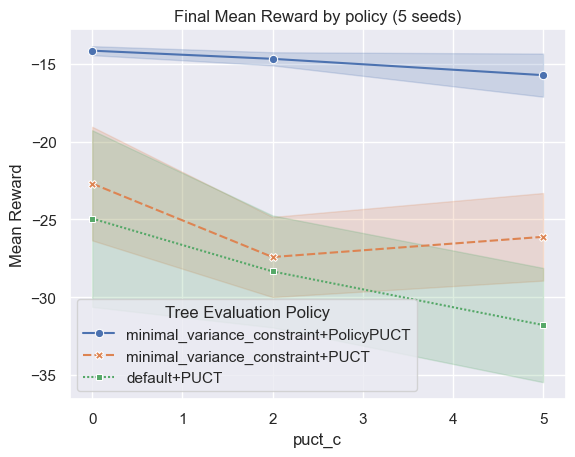

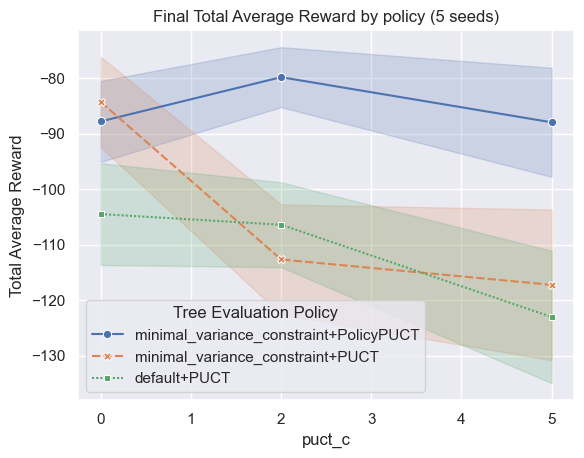

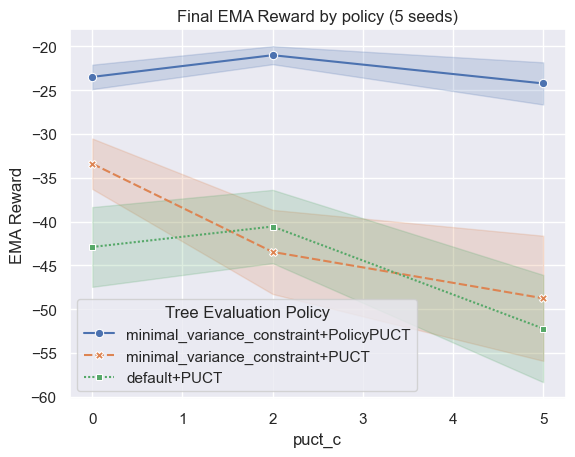

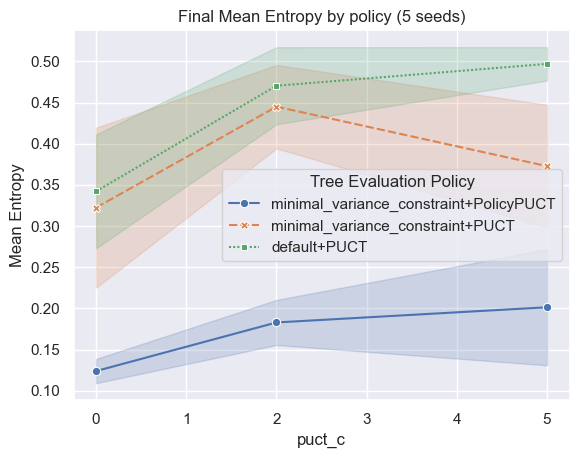

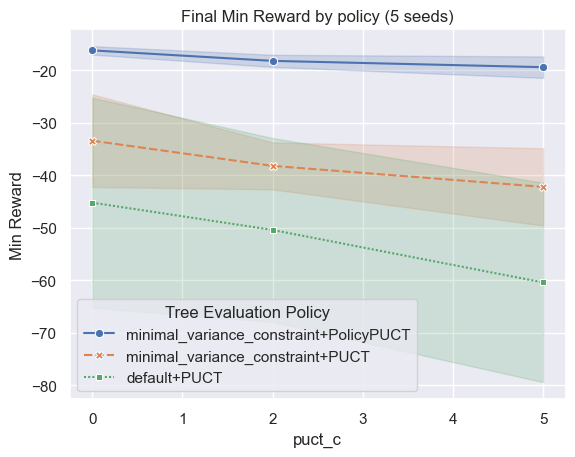

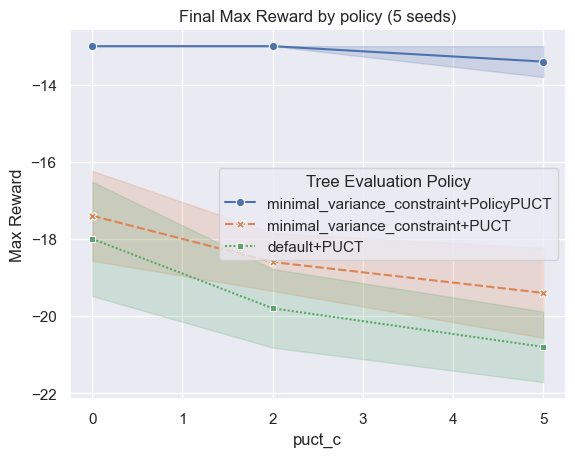

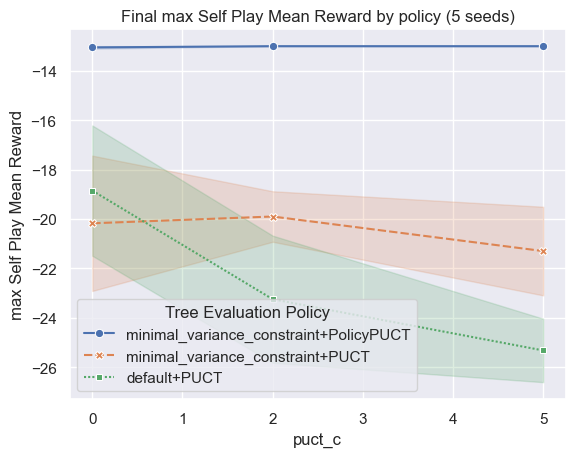

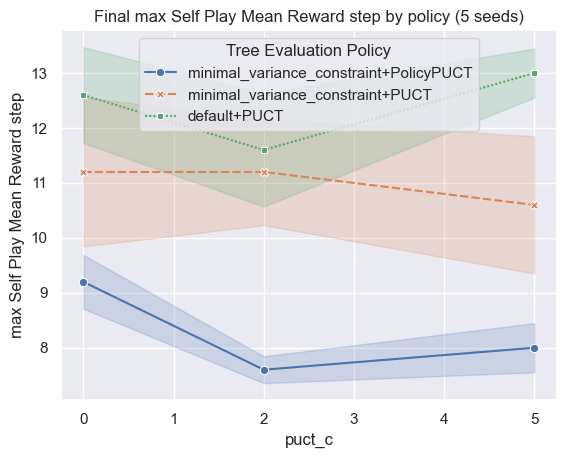

In [10]:


df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']

metrics = ['Self_Play/Mean_Reward', "Self_Play/Total_Average_Reward", "Self_Play/EMA_Reward", 'Self_Play/Mean_Entropy', 'Self_Play/Min_Reward',
           'Self_Play/Max_Reward',
           'max_Self_Play/Mean_Reward', 'max_Self_Play/Mean_Reward_step'
           ]


estimator = "mean"
for metric in metrics:
    sns.set_theme(style="darkgrid")

    # Create a line plot with confidence intervals
    sns.lineplot(data=df[df['tree_evaluation_policy'] != 'mvto'],
                 x=x_metric, y=metric,
                hue="policy_combination", style="policy_combination",
                markers=True, errorbar="se", estimator=estimator)

    # Customize the plot with titles and labels
    plt.title(f'Final {name_fn(metric)} by policy (5 seeds)')
    plt.xlabel(x_metric)  # Replace with actual x-axis label
    plt.ylabel(name_fn(metric))
    plt.legend(title='Tree Evaluation Policy')


    # save as pdf
    plt.savefig(f'{save_folder}/{name_fn(metric).replace(" ", "_")}_by_policy_{estimator}.pdf')

    # Show the plot
    plt.show()
